## Importing Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

## Loading the Dataset

In [9]:
# Creating DataBase Connection
conn = sqlite3.connect('inventory.db')

# feting vendor summery Data
df = pd.read_sql_query("select * from Vendor_sales_summery",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


## Exploratory Data Analysis

- Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should    be included in the final analysis.
- In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data       patterns, identify anomalies, and ensure data quality before proceeding with further analysis.

In [12]:
# summery statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


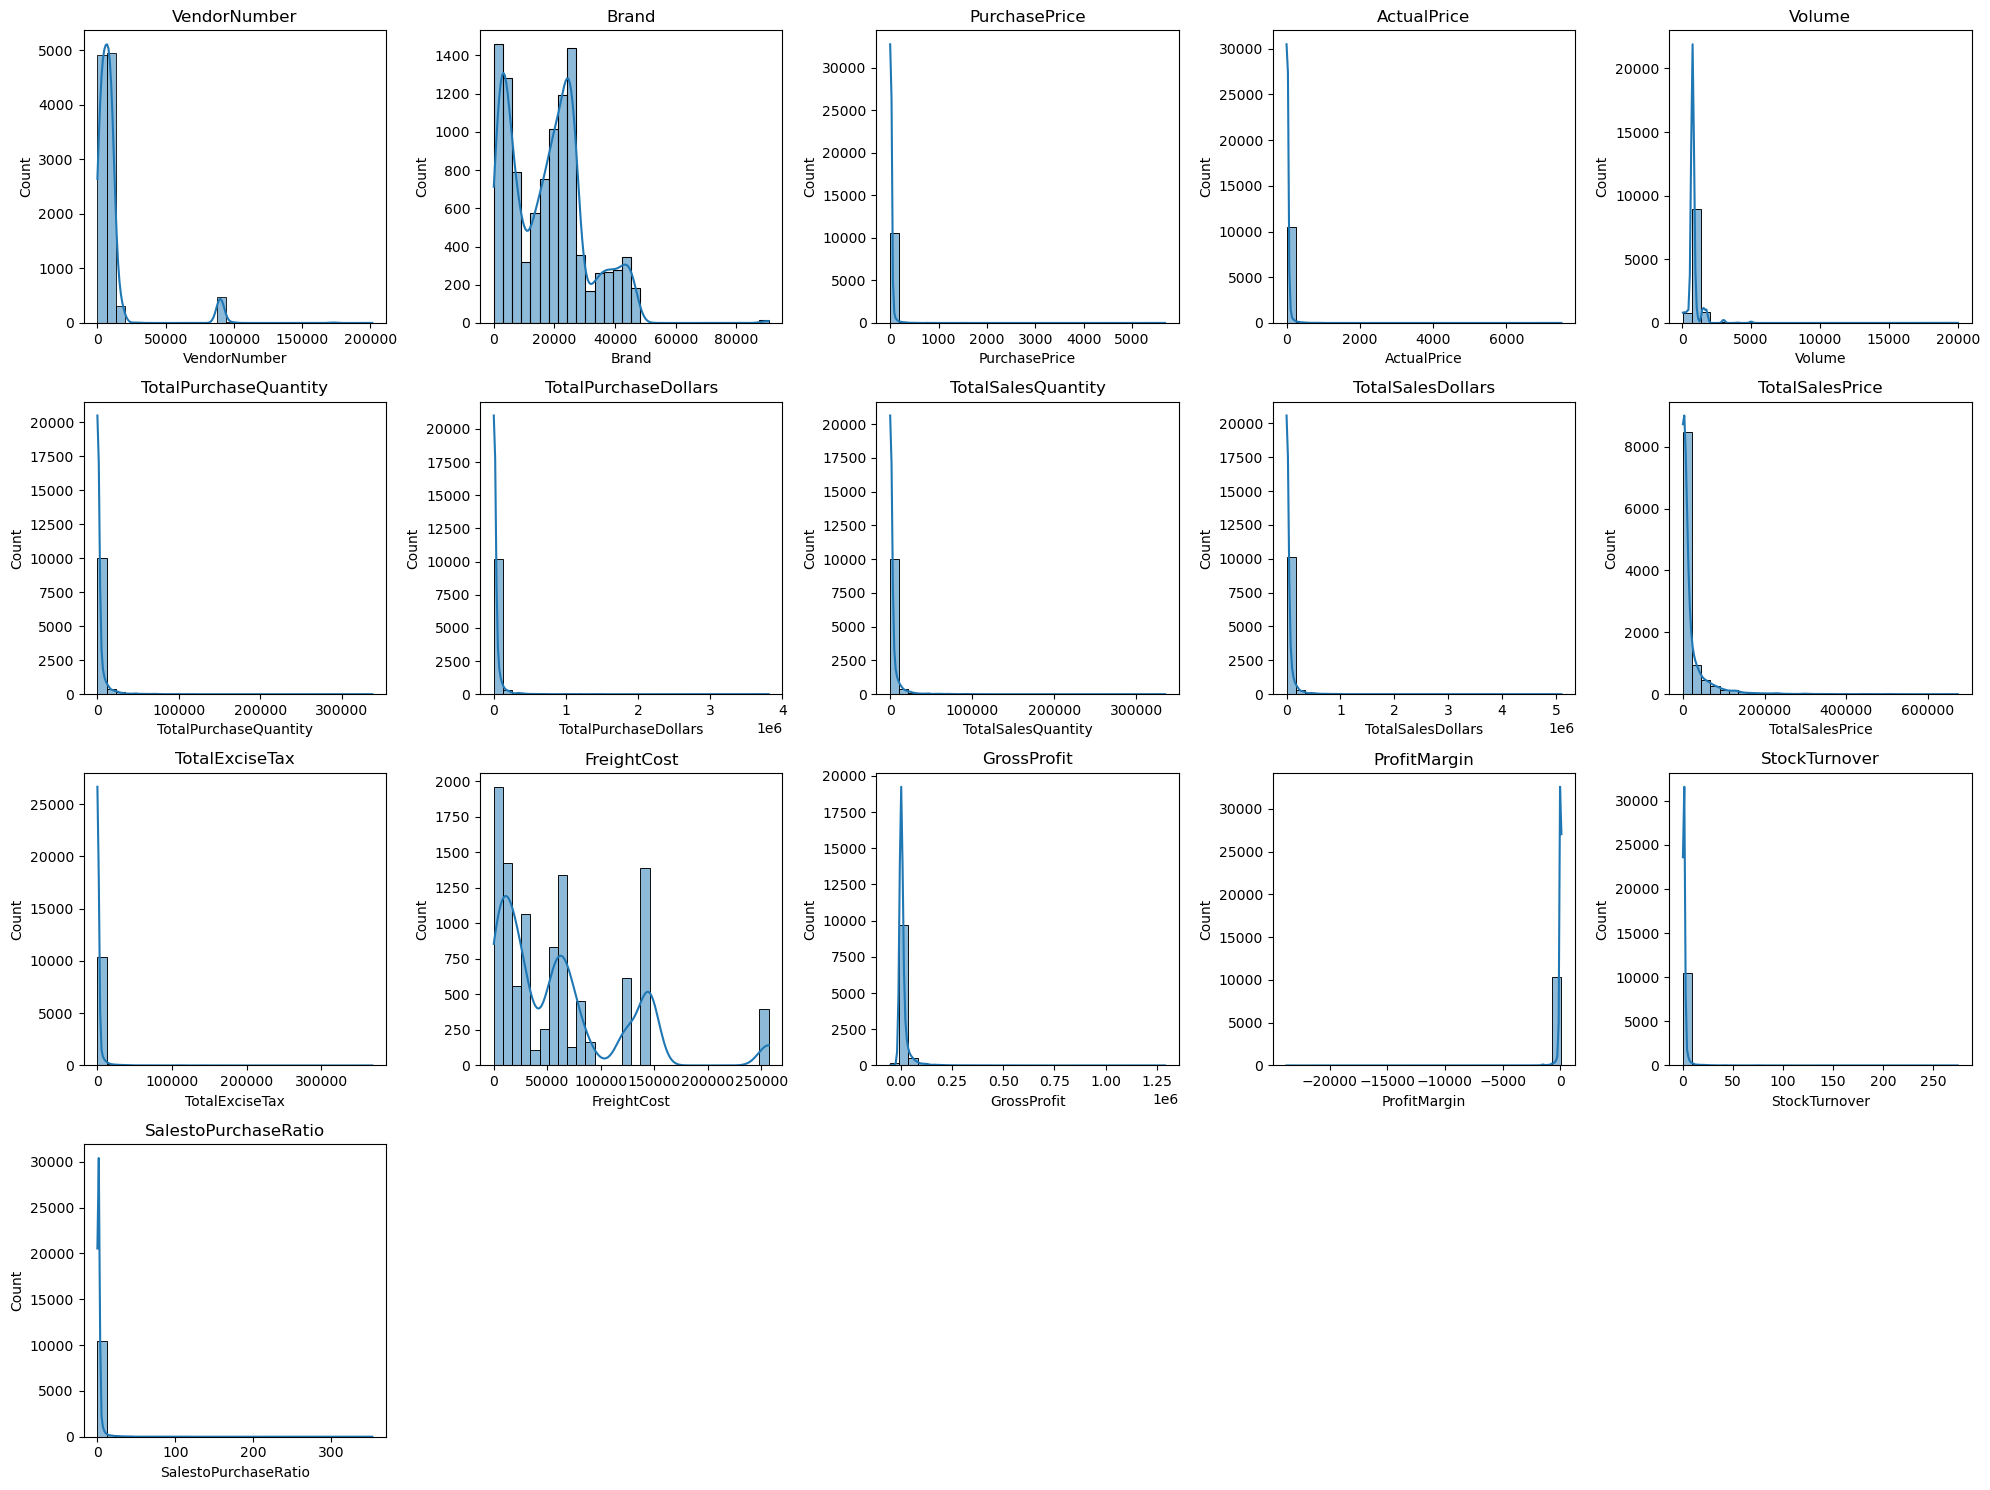

In [13]:
# Distribution plots for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(20, 15))

for i, col in enumerate(numerical_cols):
    plt.subplot(4, 5, i + 1)  # Adjust 4,5 depending on the number of columns
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
    plt.tight_layout()

plt.show()

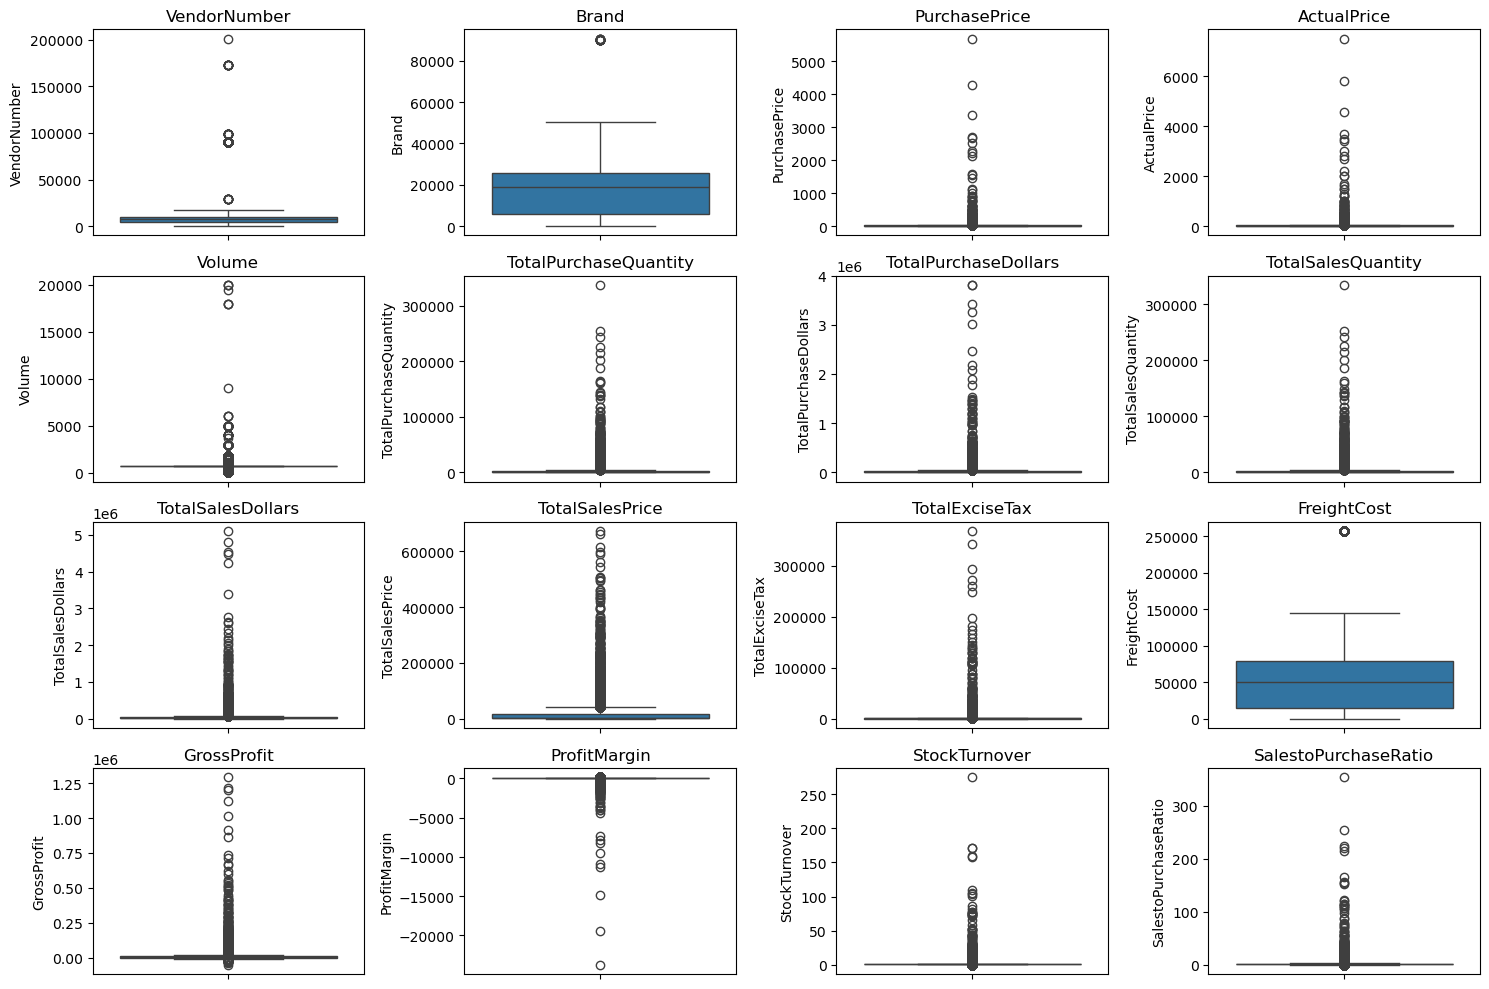

In [14]:
# Outliers Detection with Boxplot

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Summary Statistics Insights:

### Negative & Zero Values:

- Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts
lower than the purchase price..
- Profit Margin: Has a minimum of which suggests cases where revenue is zero or even lower than costs.
- Total Sales Quantity & Sales Dollars: Minimum values are O, meaning some products were purchased but never sold. These could be slow-moving or obsolete
stock.

### Outliers Indicated by High Standard Deviations:

- Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium
products.
- Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
- Stock Turnover. Ranges from O to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than I indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

In [20]:
# let's filter the data by removing inconsistencies

df = pd.read_sql_query("""select *
from Vendor_sales_summery
where GrossProfit > 0
and ProfitMargin > 0
and TotalSalesQuantity > 0
""",conn)

In [21]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


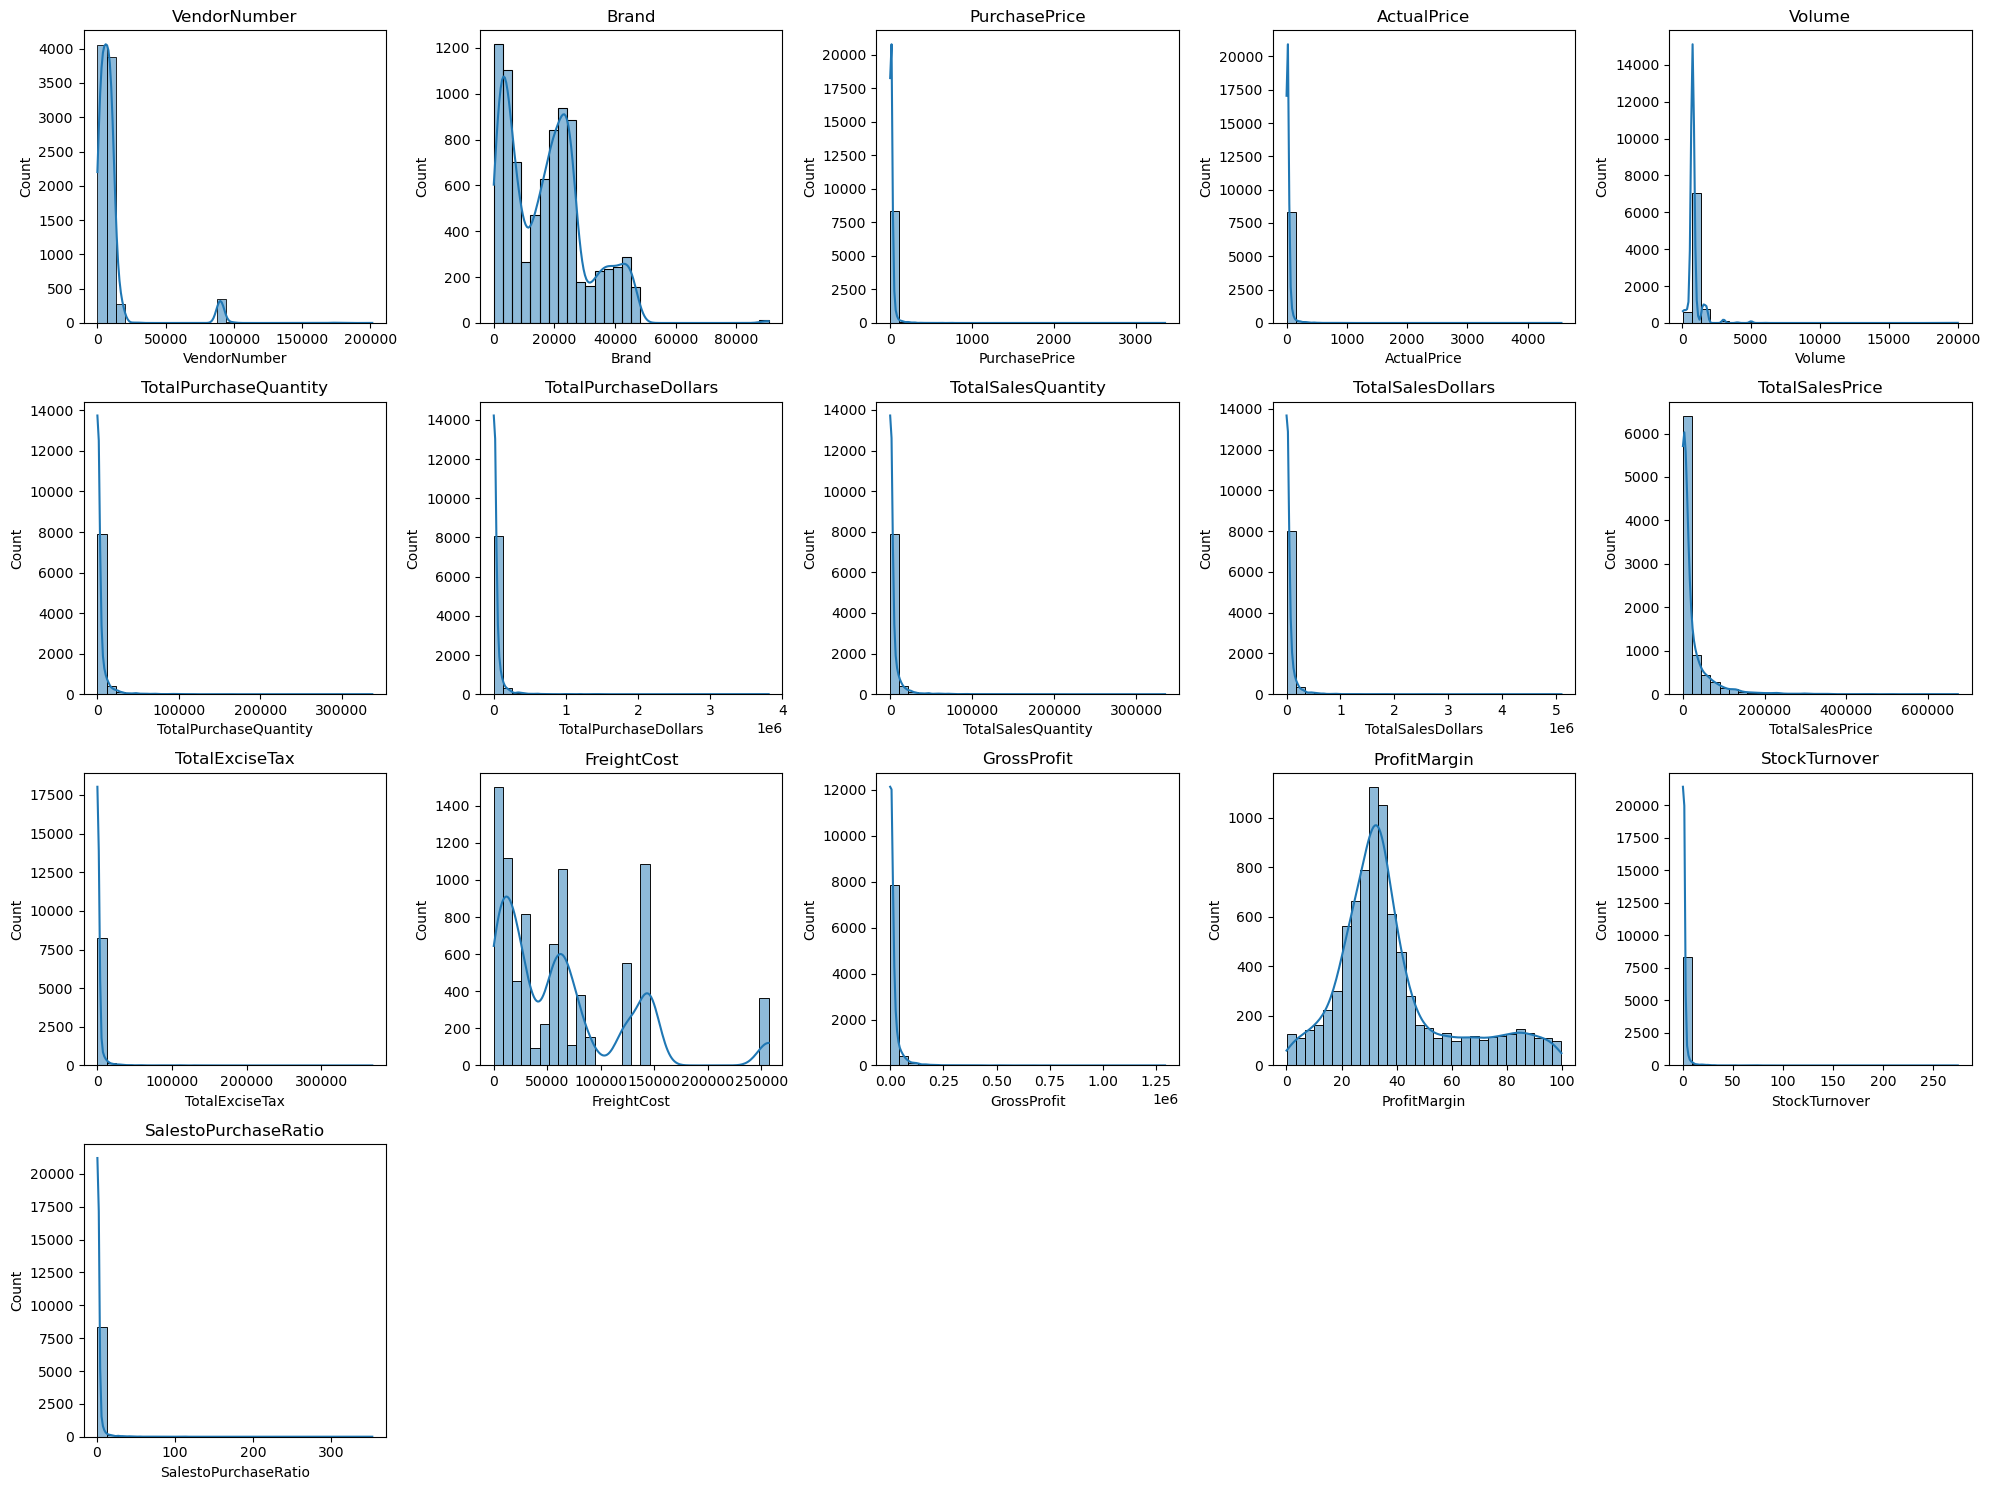

In [22]:
# Distribution plots for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(20, 15))

for i, col in enumerate(numerical_cols):
    plt.subplot(4, 5, i + 1)  # Adjust 4,5 depending on the number of columns
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
    plt.tight_layout()

plt.show()

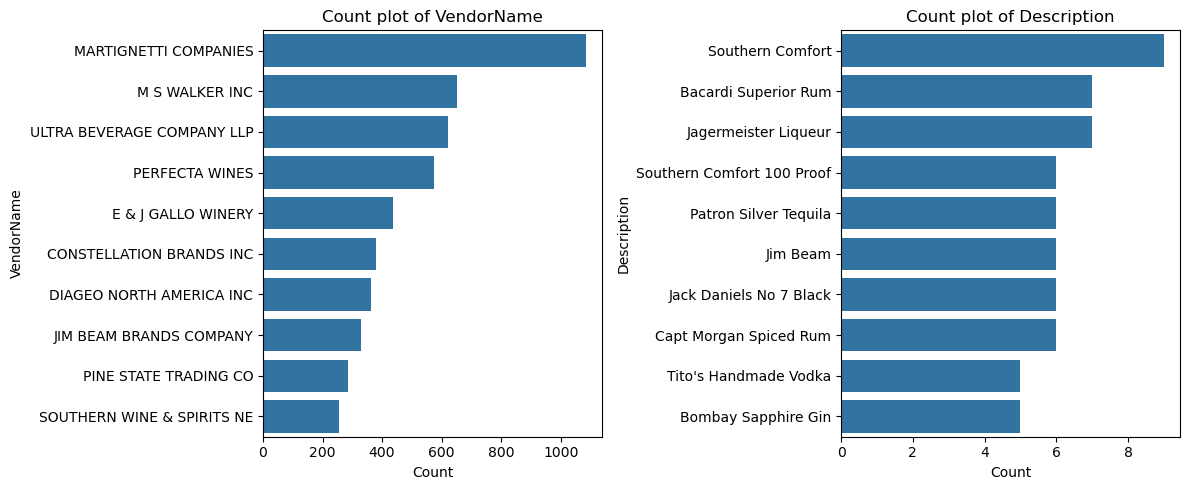

In [23]:
# Count Plots for Categorical Columns

categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))

for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i + 1)
    order = df[col].value_counts().index[:10]
    sns.countplot(y=df[col], order=order)
    plt.title(f"Count plot of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

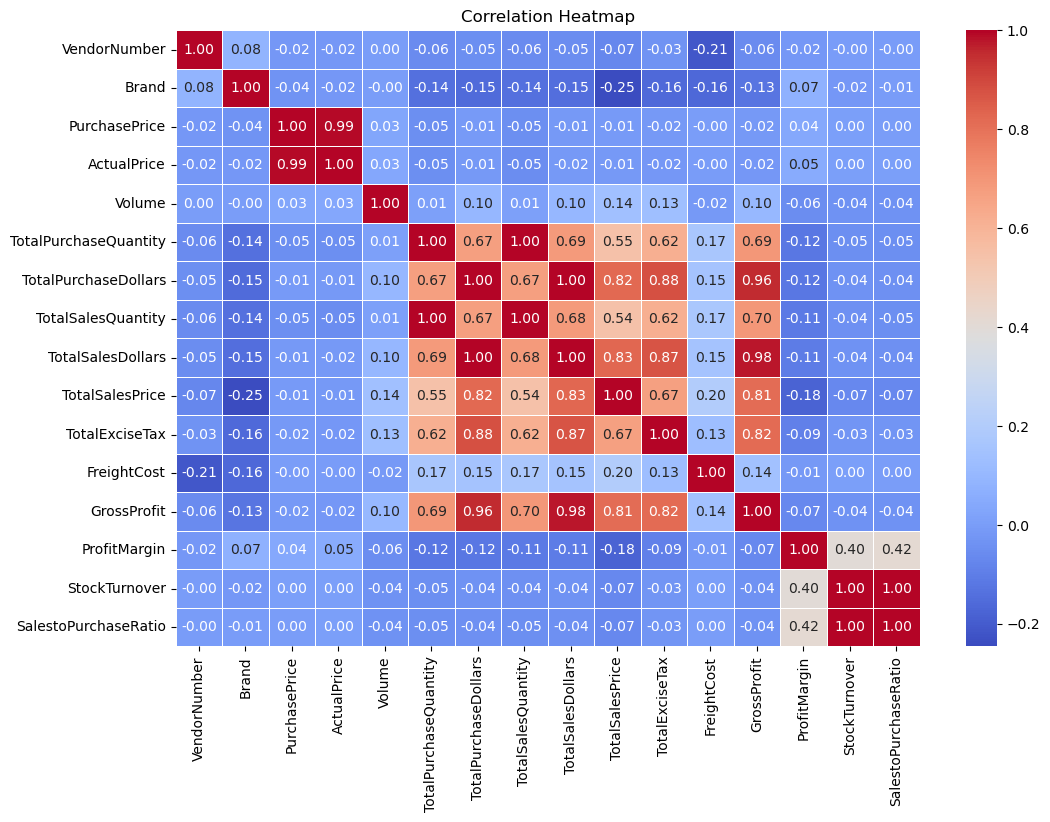

In [24]:
# Coorealtion Heatmap
plt.figure(figsize=(12,8))
correlation_matrix=df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True, fmt='.2f', cmap="coolwarm",linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Correlation Insights

- PurchasePrice has weak correlations with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.
- Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.
- Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.
- StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.

# Data Analysis

1. Identify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins.

In [29]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars' : 'sum',
    "ProfitMargin" : 'mean'}).reset_index()

In [30]:
low_sales_thresold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margine_thresold = brand_performance['ProfitMargin'].quantile(0.85)

In [31]:
low_sales_thresold

560.299

In [32]:
high_margine_thresold

64.97017552750113

In [33]:
# filter breands with low sales but high profit margins

target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_thresold) &
    (brand_performance['ProfitMargin'] <= high_margine_thresold)
]

print("Brands with Low Sates but High Profit Margins: ")
display(target_brands.sort_values( 'TotalSalesDollars'))

Brands with Low Sates but High Profit Margins: 


,Description,TotalSalesDollars,ProfitMargin
6942,Terruzzi & Puthod Vernaccia,4.99,32.464930
2897,Firefly Ridge Chard,5.79,31.088083
148,Albero Sparkling Wh Organic,5.79,28.497409
6488,Smirnoff Light Strawberry,5.94,50.168350
178,Allen's Blue Curacao Liqueur,5.99,20.033389
...,...,...,...
1796,Ch de Pez 10 St Estephe Brdx,558.87,45.046254
5489,Pepperwood Grove Pnt Grigio,559.25,33.696916
1987,Clos Rochette Faiveley 09,559.72,14.264275
4224,La Fee NV Absinthe,559.72,44.847424


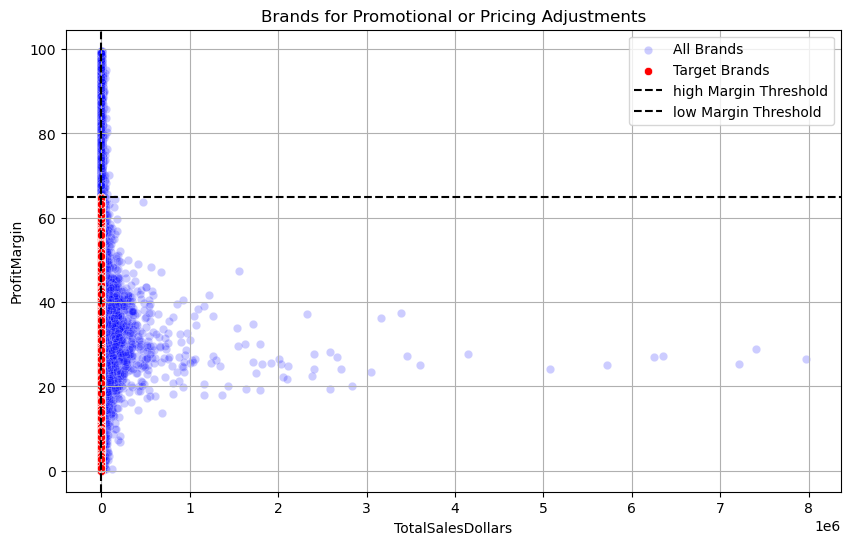

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars',y='ProfitMargin',color='blue',label='All Brands',alpha=0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin',color='red',label= "Target Brands" )

plt.axhline(high_margine_thresold, linestyle='--',color= 'black',label="high Margin Threshold")
plt.axvline(low_sales_thresold, linestyle='--',color= 'black',label="low Margin Threshold")

plt.xlabel = ("Total Sales ($)")
plt.ylabel = ("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt. legend()
plt.grid(True)
plt. show()

In [35]:
brand_performance = brand_performance[brand_performance["TotalSalesDollars"]<10000] # for better visualization

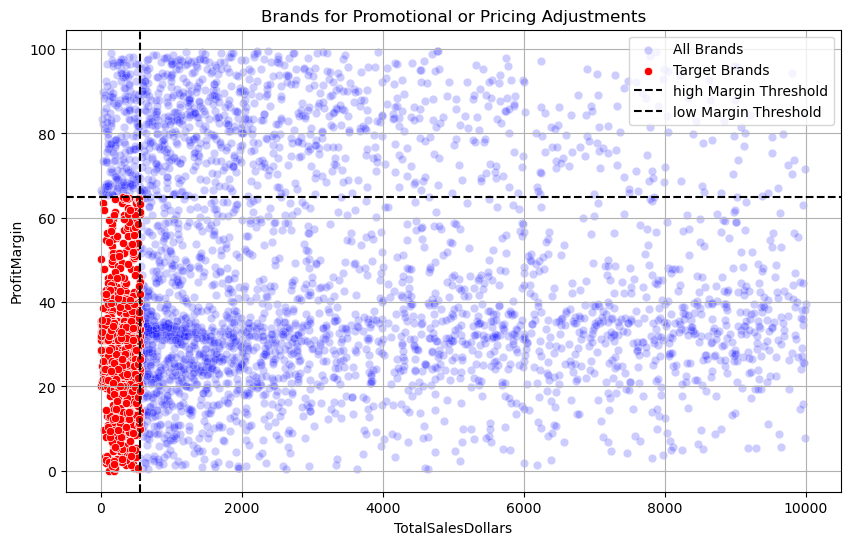

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars',y='ProfitMargin',color='blue',label='All Brands',alpha=0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin',color='red',label= "Target Brands" )

plt.axhline(high_margine_thresold, linestyle='--',color= 'black',label="high Margin Threshold")
plt.axvline(low_sales_thresold, linestyle='--',color= 'black',label="low Margin Threshold")

plt.xlabel = ("Total Sales ($)")
plt.ylabel = ("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt. legend()
plt.grid(True)
plt. show()

2. Which vendors and brands demonstrate the highqst sales performance?

In [38]:
 # Top Vendors & Brands by Sales Performance

top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)

In [39]:
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [40]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [41]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value/1_000_000:2f}M"
    elif value >= 1_000:
        return f"{value/1_000:2f}K"
    else:
        return str(value)

In [42]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    7.964747M
Tito's Handmade Vodka      7.399658M
Grey Goose Vodka           7.209608M
Capt Morgan Spiced Rum     6.356321M
Absolut 80 Proof           6.244752M
Jameson Irish Whiskey      5.715760M
Ketel One Vodka            5.070084M
Baileys Irish Cream        4.150122M
Kahlua                     3.604859M
Tanqueray                  3.456698M
Name: TotalSalesDollars, dtype: object

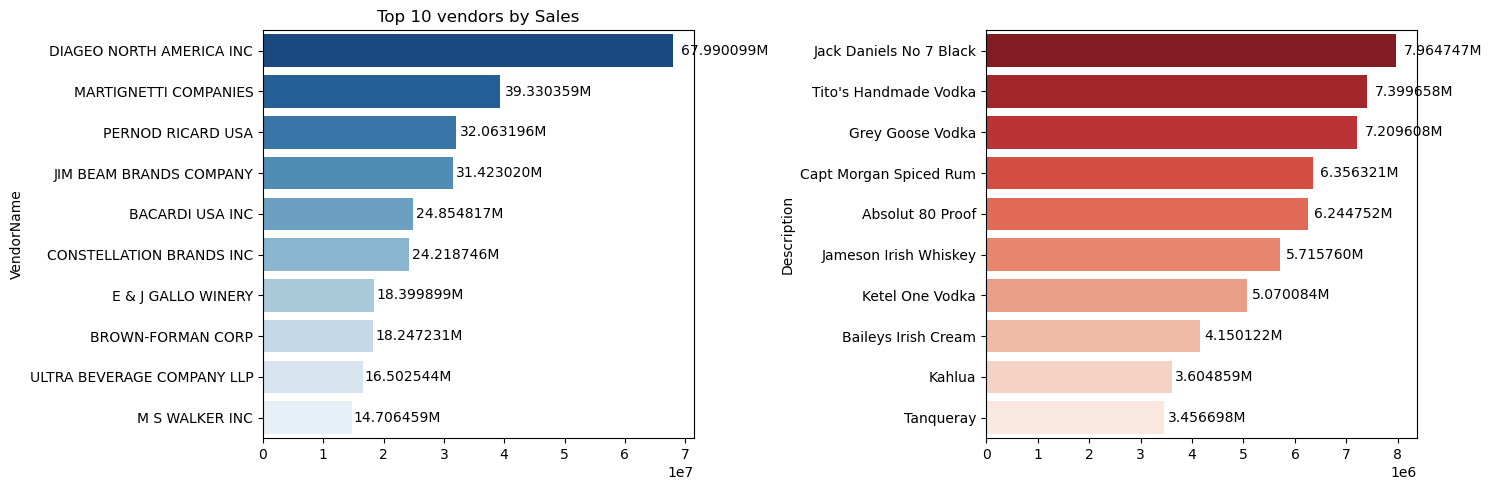

In [43]:
plt.figure(figsize=(15,5))

# plot for top vendors 
plt.subplot(1,2,1)
ax1=sns.barplot(y=top_vendors.index,x=top_vendors.values,palette="Blues_r")
plt.title("Top 10 vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha='left',va='center',fontsize=10,color='black')

# Plot for Top Brands
plt. subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title=("Top 1O Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()) ,
             ha='left', va='center',fontsize=10, color='black')

plt.tight_layout()
plt.show()

3. Which vendors contribute the most to total purchase dollars?

In [45]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars' : 'sum',
    "GrossProfit" : 'sum',
    'TotalSalesDollars': 'sum'}).reset_index()

vendor_performance.shape

(119, 4)

In [46]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/ vendor_performance['TotalPurchaseDollars'].sum()

In [47]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%',ascending = False),2)

In [48]:
# Display to 10 vendors

top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.097226M,17.892873M,67.990099M,0.16
57,MARTIGNETTI COMPANIES,25.502096M,13.828264M,39.330359M,0.08
68,PERNOD RICARD USA,23.851164M,8.212032M,32.063196M,0.08
46,JIM BEAM BRANDS COMPANY,23.494304M,7.928716M,31.423020M,0.08
6,BACARDI USA INC,17.432020M,7.422797M,24.854817M,0.06
20,CONSTELLATION BRANDS INC,15.273708M,8.945038M,24.218746M,0.05
11,BROWN-FORMAN CORP,13.238939M,5.008291M,18.247231M,0.04
30,E & J GALLO WINERY,12.068539M,6.331360M,18.399899M,0.04
106,ULTRA BEVERAGE COMPANY LLP,11.167082M,5.335463M,16.502544M,0.04
53,M S WALKER INC,9.764313M,4.942146M,14.706459M,0.03


In [49]:
top_vendors['PurchaseContribution%'].sum()

0.6600000000000001

In [50]:
top_vendors['Cumulative_Contribution'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution
25,DIAGEO NORTH AMERICA INC,50.097226M,17.892873M,67.990099M,0.16,0.16
57,MARTIGNETTI COMPANIES,25.502096M,13.828264M,39.330359M,0.08,0.24
68,PERNOD RICARD USA,23.851164M,8.212032M,32.063196M,0.08,0.32
46,JIM BEAM BRANDS COMPANY,23.494304M,7.928716M,31.423020M,0.08,0.40
6,BACARDI USA INC,17.432020M,7.422797M,24.854817M,0.06,0.46
20,CONSTELLATION BRANDS INC,15.273708M,8.945038M,24.218746M,0.05,0.51
11,BROWN-FORMAN CORP,13.238939M,5.008291M,18.247231M,0.04,0.55
30,E & J GALLO WINERY,12.068539M,6.331360M,18.399899M,0.04,0.59
106,ULTRA BEVERAGE COMPANY LLP,11.167082M,5.335463M,16.502544M,0.04,0.63
53,M S WALKER INC,9.764313M,4.942146M,14.706459M,0.03,0.66


In [51]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100

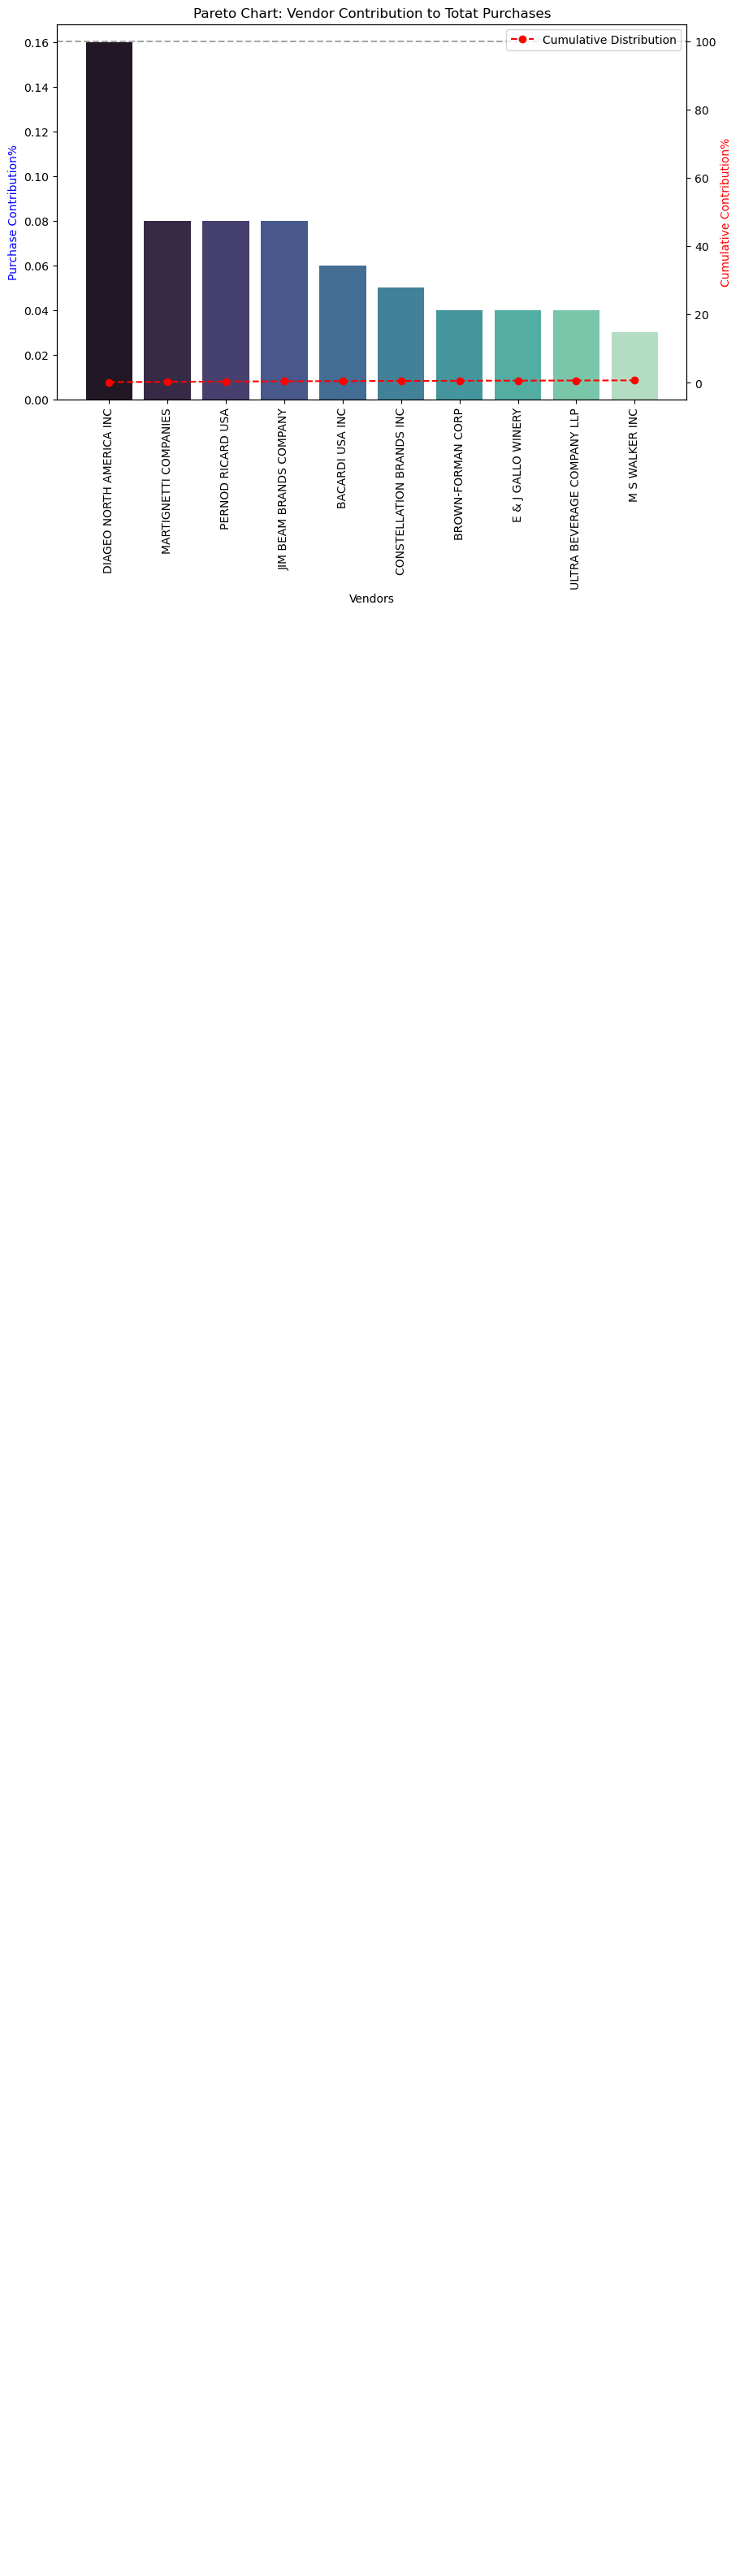

In [52]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()

fig, ax1 = plt.subplots(figsize=(10,6))

# Bar Plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette='mako',ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i,value-1,str(value)+'%',ha='center',fontsize=10,color='white')

# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'],top_vendors['Cumulative_Contribution%'], color='red',marker='o',linestyle= 'dashed',label='Cumulative Distribution')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution%',color='blue')
ax2.set_ylabel('Cumulative Contribution%',color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Totat Purchases')

ax2.axhline(y=100,color='grey',linestyle='dashed',alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

4. How much of total procurement is dependent on top vendors ?

In [54]:
print(f"Total Purchase Contribution of Top 10 Vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)} %")

Total Purchase Contribution of Top 10 Vendors is 0.66 %


TypeError: 'str' object is not callable

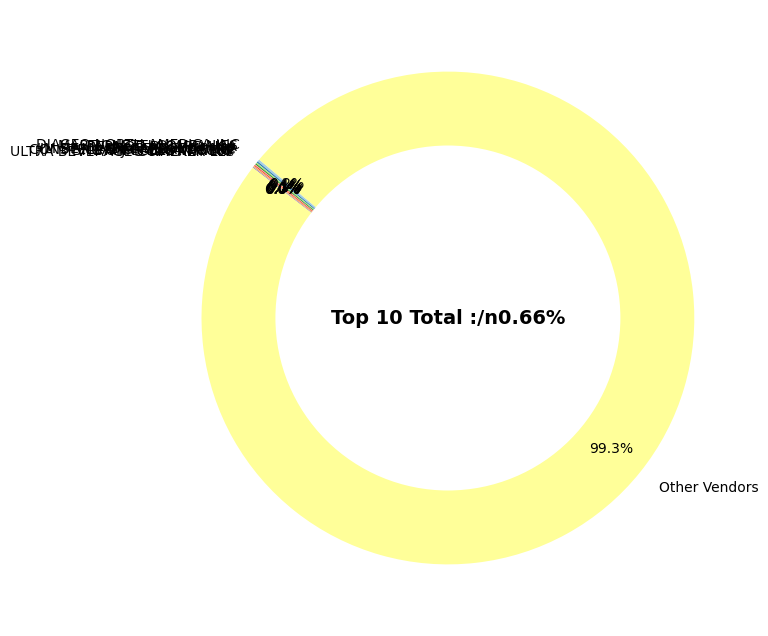

In [55]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax= plt.subplots(figsize=(8,8))
wedges,texts,autotexts = ax.pie(purchase_contributions, labels = vendors, autopct='%1.1f%%',
                               startangle=140,pctdistance=0.85,colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
center_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(center_circle)

# Add total contribution annotation in the center
plt.text(0,0,f"Top 10 Total :/n{total_contribution:.2f}%",fontsize=14,fontweight='bold',ha='center',va='center')

plt.title("Top 10 Vendors Purchase Contribution (%)")
plt.show()

5. Does Purchasing in bulk reduce the unit price and what is the optimal purchase volumne for cost saving ?

In [68]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [70]:
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"],q=3,labels=["Small","Medium","Large"])

In [72]:
df[['OrderSize','TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
8559,Small,2
8560,Small,6
8561,Small,2
8562,Small,1


In [74]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


AttributeError: module 'matplotlib.pyplot' has no attribute 'tile'

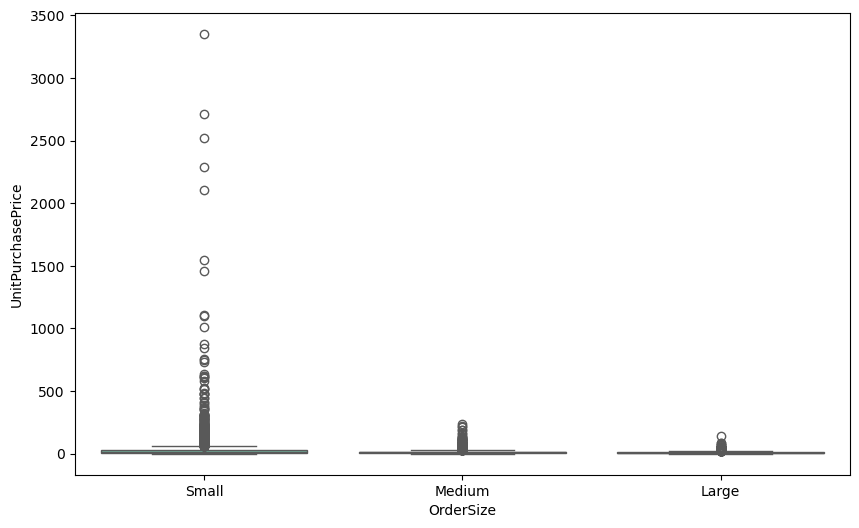

In [76]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x="OrderSize",y="UnitPurchasePrice",palette="Set2")
plt.tile("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Oder size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

- Vendors buying in Bulk(large order size) get the lowest unit price ($10.78 per Unit), Meaning higher margins if they can manage inventory efficiently.
- The price differnece between small and large orders is substantial (~72% reduction in unit cost)
- This suggests that bulk pricing strategies successfully encourage vendors to purchase in large volume, Leading to higher overall sales despite lower per unit revenue.    